In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sketulate import Sketulate, SketulateInteraction

# Introduction
The Sketulate package is an interactive tool for Jupyter notebooks that allows the user to sketch a function or density, which will then be automatically translated into a runnable method that can be used for generating simulated data. This notebook shows the following:

1. Generates a function f1(x)
2. Generates a function f2(y)
3. Generates density distributions x & y
4. Creates an interaction term f3(x,y)
5. Simulates z = f1(x) + f2(y) + f3(x,y) and includes everything in a dataframe.

Quick and easy to create complex simulated data!


In [7]:
# Sketch f1(x)
f1 = Sketulate()
f1.sketch()



In [8]:
# Sketch f2(y)
f2 = Sketulate()
f2.sketch()




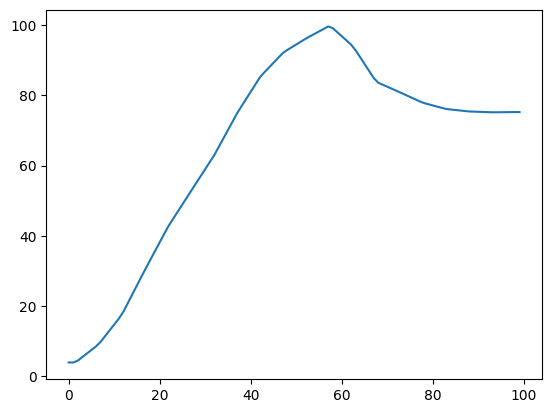

In [9]:
plt.plot(f1.f.predict(np.linspace(0,25,100).reshape(-1,1)))

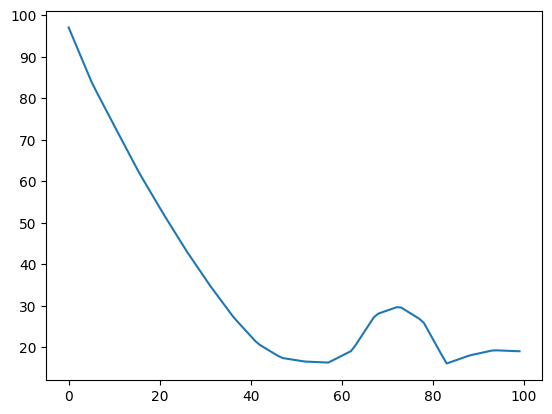

In [10]:
plt.plot(f2.f.predict(np.linspace(0,45,100).reshape(-1,1)))

## Density Version

In [11]:
# Create a new canvas in density mode (use the dropdown)
x = Sketulate()
x.sketch()

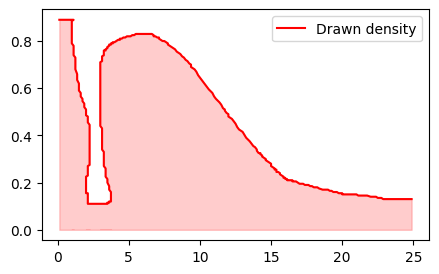

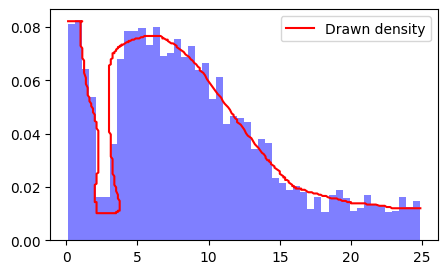

In [12]:
# Plot the drawn density
plt.figure(figsize=(5,3))
plt.plot(x.x, x.y, 'r-', label='Drawn density')
plt.fill_between(x.x, 0, x.y, color='r', alpha=0.2)
plt.legend()
plt.show()

# Sample from density and plot histogram
samples = x.g(5000)
plt.figure(figsize=(5,3))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='blue')
plt.plot(x.x, x.y_norm, 'r-', label='Drawn density')
plt.legend()
plt.show()


In [14]:
y = Sketulate()
y.sketch()

## Interaction Terms


In [15]:
f3 = SketulateInteraction(
    x_range=(0,25),
    y_range=(0,45),
    z_range=(0,200),
    grid_size=10
)

display(f3.sketch())

None

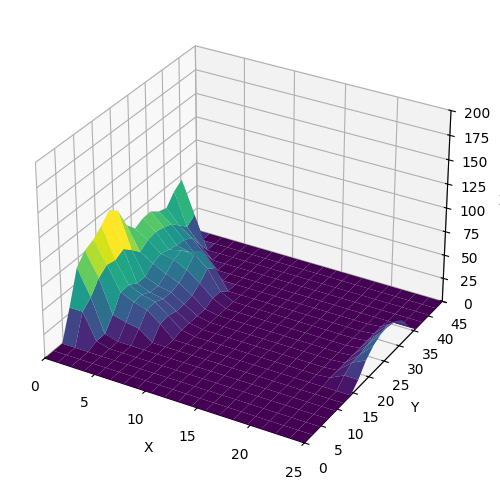

In [16]:
f3.plot_fitted_surface(n_points=20)

### Complete Example: Generate Simulated Data

In [19]:
# Start by creating the simulated input data for x and y

# Draw 1000 samples for x
x_sample = x.g(1000)
y_sample = y.g(1000)

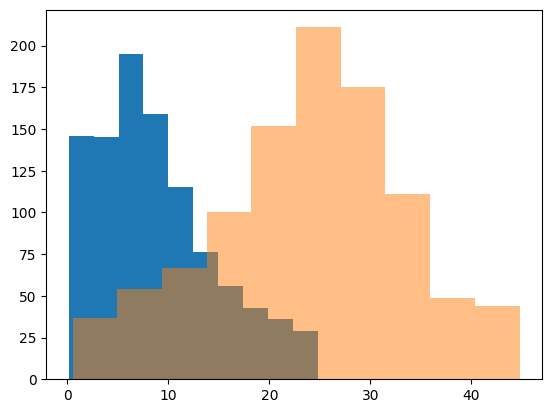

In [20]:
plt.hist(x_sample)
plt.hist(y_sample, alpha=0.5)
plt.show()

In [21]:
z = f1.f.predict(x_sample.reshape(-1,1)) + f2.f.predict(y_sample.reshape(-1,1)) + f3.predict(x_sample, y_sample)

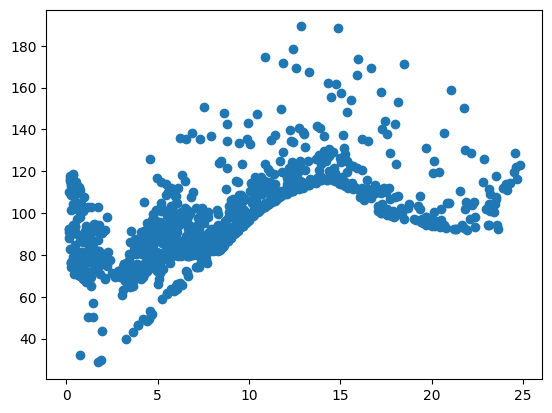

In [22]:
plt.scatter(x_sample, z)

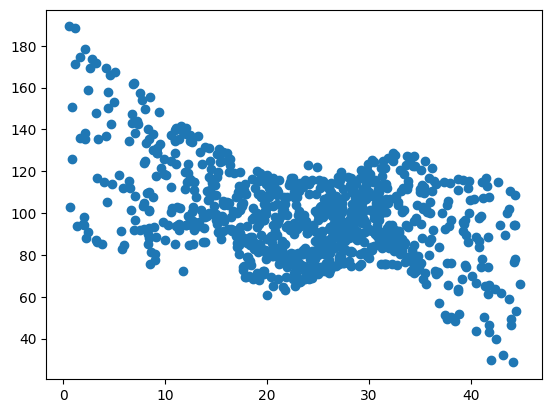

In [23]:
plt.scatter(y_sample, z)

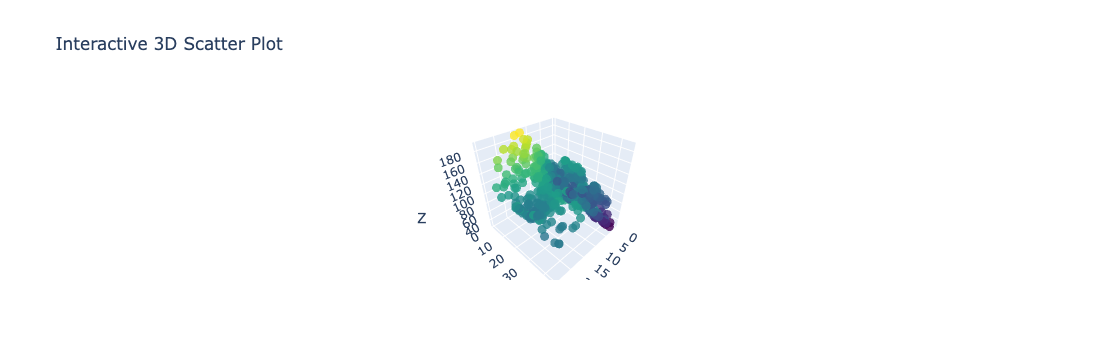

In [24]:
import plotly.graph_objects as go

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_sample,
    y=y_sample,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,           # color by z-value
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="Interactive 3D Scatter Plot"
)

# Show plot (rotatable, zoomable, pan)
fig.show()
